# Carrier Tracking

As the GPS satellites pass overhead, the 1575.42 MHz carrier signal is Doppler shifted higher as it rises over the horizon, and then decreases until it is shifted lower as it sets across the horizon. If the satellite is directly overhead (zenith) there is no shift at all. 

## About the Doppler Effect

If you aren't familiar with the Doppler effect, it is the reason that a car or train horn has a pitch shift as it passes by. [Here is a slightly obnoxious demonstration.](https://www.youtube.com/watch?v=a3RfULw7aAY) The same thing is happening to the satellite signal, but it is a radio wave rather than a sound wave. For a more technical explanation check out [Khan Academy](https://www.youtube.com/watch?v=dc7l7Qqa8xk).

## Algorithm

The tracking loop is a special class of phase-locked loop called a Costas loop. Since bit transitions from -1 to 1 in the data will cause periodic 180 degree phase shifts in the carrier wave, the loop can not lose lock when this happens. The Costas loop consists of a local oscillator which produces a cosine wave that should be equal in frequency to the carrier, as well as a sine wave 90 degrees out of phase. 

These waves are mixed in to the signal, and the result is passed through a discriminator function that returns the adjustment that the oscillator needs to remain aligned with the incoming wave. A low pass filter is applied to the discriminator to add stability. 

# Code Tracking

Code tracking is needed to keep the local C/A code aligned as the incoming signal drifts out of alignment over time. This process is almost entirely interwoven with carrier tracking, where if one of the tracking loops is not working, it is unlikely that the other will. 

The basic method to track the C/A code is to mix the incoming code with a local replica, as well as two other replica codes that are a half chip out of phase with the primary. These are referred to as early, prompt, and late, where early is offset by a half chip in the negative direction, and late in the positive. 

Due to the cross-correlative properties of the Gold Codes, a properly aligned Gold Code multiplied by the incoming signal should approach either 1 or -1 (depending on the 50bps data bit that is being transmitted). To confirm this, we integrate and dump the result over 1ms (the time it takes for a complete Gold Code to be sent). 

If the result of the integration for the prompt code is greater than the result for the early or late codes, then the code is aligned correctly. If it is less or equal to the offset codes, an adjustment is made to realign the codes. This adjustment is determined by a discriminator equation similar to the carrier tracking process.


# Filtering

As mentioned above, the code and carrier tracking loops have filtered feedback to add stability. Derivation of the filter coefficients is described in chapter 7 of Borre. More advanced reciever designs can adjust the noise bandwidth dynamically based on current noise conditions to keep the loop locked.

# Demo

The tracking loop must run over several iterations in order to give a good result. Demo code contained in the notebook does not adequately show the processes involved in carrier and code tracking, however examination of the output plots shows the tracking proccess at work. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency for this notebook
fs = 5e6
# length of data sample for this notebook
tLen = .01

In [25]:
t = np.linspace(0, tLen, tLen*fs)

inputSignalFreq = 5e3
acquiredSignalFreq = inputSignalFreq - 50

inputSignal = np.cos(t * inputSignalFreq * 2 * np.pi)
refSignal = np.cos(t * acquiredSignalFreq * 2 * np.pi)

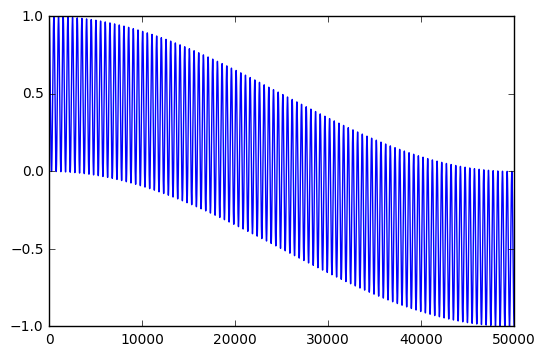

In [26]:
isig = inputSignal * refSignal

plt.plot(inputSignal * refSignal)
plt.show()

In [99]:
carrFreq = acquiredSignalFreq
remCarrPhase = 0

oldCarrNco   = 0
oldCarrError = 0

In [100]:
rawSignal = inputSignal[0:5000]
blksize = 5000

In [117]:
 # Generate the carrier frequency to mix the signal to baseband
#time = np.array(range(0,blksize))/fs
time = t[0:5000]

#print("Length of time array for cos and sin: %d" %len(time))
# Get the argument to sin/cos functions
trigarg = ((carrFreq * 2.0 * np.pi) 
           * time) 
print(len(trigarg))
# Finally compute the signal to mix the collected data to baseband
carrCos = np.cos(trigarg[0:blksize])
carrSin = np.sin(trigarg[0:blksize])

# First mix to baseband
qBasebandSignal = carrCos * rawSignal
iBasebandSignal = carrSin * rawSignal

5000


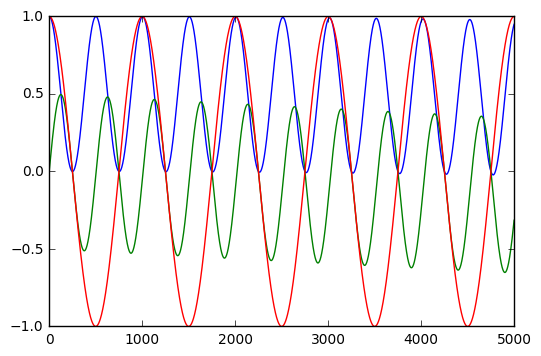

In [124]:
plt.plot(qBasebandSignal)
plt.plot(iBasebandSignal)
plt.plot(inputSignal[0:5000])
plt.show()

In [122]:
# Find PLL error and update carrier NCO
# Implement carrier loop discriminator (phase detector)
carrError = np.arctan(qBasebandSignal / iBasebandSignal) / (2.0 * np.pi)

# Implement carrier loop filter and generate NCO command
carrNco = oldCarrNco + coeffCar1 * (carrError - oldCarrError) + carrError * coeffCar2
oldCarrNco   = carrNco
oldCarrError = carrError

# Modify carrier freq based on NCO command
carrFreq = acquiredSignalFreq + carrNco



/home/evan/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [123]:
for i in range(500):
     # Generate the carrier frequency to mix the signal to baseband
    #time = np.array(range(0,blksize))/fs
    time = t[0:5000]

    #print("Length of time array for cos and sin: %d" %len(time))
    # Get the argument to sin/cos functions
    trigarg = ((carrFreq * 2.0 * np.pi) 
               * time) 
    print(len(trigarg))
    # Finally compute the signal to mix the collected data to baseband
    carrCos = np.cos(trigarg[0:blksize])
    carrSin = np.sin(trigarg[0:blksize])

    # First mix to baseband
    qBasebandSignal = carrCos * rawSignal
    iBasebandSignal = carrSin * rawSignal
    
    
    
    # Find PLL error and update carrier NCO
    # Implement carrier loop discriminator (phase detector)
    carrError = np.arctan(qBasebandSignal / iBasebandSignal) / (2.0 * np.pi)

    # Implement carrier loop filter and generate NCO command
    carrNco = oldCarrNco + coeffCar1 * (carrError - oldCarrError) + carrError * coeffCar2
    oldCarrNco   = carrNco
    oldCarrError = carrError

    # Modify carrier freq based on NCO command
    carrFreq = acquiredSignalFreq + carrNco

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


/home/evan/.local/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in true_divide


5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [107]:
# Calculate filter coefficient values for carrier loop
def _calcLoopCoef(LoopNoiseBandwidth, Zeta, LoopGain):
        '''
        Calculates the loop coefficients tau1 and tau2. 

        This process is discussed in sections 7.1-7.3 of Borre.
        '''
        # Solve for the natural frequency
        Wn = LoopNoiseBandwidth*8*Zeta / (4*Zeta**2 + 1)

        # Solve for tau1 and tau2
        tau1 = LoopGain / (Wn * Wn);
        tau2 = (2.0 * Zeta) / Wn;

        coeff1 = tau2/tau1
        coeff2 = .001/tau1

        return (coeff1, coeff2)



coeffCar1, coeffCar2 = _calcLoopCoef(2,.7,25)